#  Support Vector Machines (SVM) — Notes

---

## 1. Setup

We observe training data
$$(x^{(i)}, Y^{(i)}), \quad i = 1,\ldots,N,$$
where

- $x^{(i)} \in \mathbb{R}^k$ (feature vector),
- $Y^{(i)} \in \{-1,+1\}$ (class label; 0 can be recoded to $-1$).

A classifier is a function  
$$\hat{Y}:\mathbb{R}^k \to \{-1,0,1\}.$$

Define regions:
- $R_- = \{x : \hat{Y}(x) = -1\}$
- $R_+ = \{x : \hat{Y}(x) = 1\}$
- $R_0 = \{x : \hat{Y}(x) = 0\}$

We classify using a function $d(x)$:

- If $d(x) < 0$, predict $-1$  
- If $d(x) > 0$, predict $+1$  
- If $d(x) = 0$, $x$ lies on the decision boundary

---

## 2. Linear Classifiers and Hyperplanes

A hyperplane in $\mathbb{R}^k$ is
$$H_{w,b} = \{x : w\cdot x + b = 0\},$$
where $w \neq 0$ and $b \in \mathbb{R}$.

Half-spaces:
- $H_{w,b}^+ = \{x : w\cdot x + b > 0\}$
- $H_{w,b}^- = \{x : w\cdot x + b < 0\}$

A **linear classifier** is  
$$d(x) = w\cdot x + b.$$

---

## 3. Linearly Separable Case

If the classes are perfectly separable, then:

- If $Y^{(i)} = 1$ then $w\cdot x^{(i)} + b > 0$
- If $Y^{(i)} = -1$ then $w\cdot x^{(i)} + b < 0$

Equivalent compact form:
$$Y^{(i)}(w\cdot x^{(i)} + b) > 0.$$

Since we have finitely many points, we can scale $(w,b)$ so that:
$$Y^{(i)}(w\cdot x^{(i)} + b) \ge 1. \tag{1}$$

Then:

- Class $+1$ points satisfy $w\cdot x + b \ge 1$
- Class $-1$ points satisfy $w\cdot x + b \le -1$

Margin hyperplanes:
- $H^+: w\cdot x + b = 1$
- $H^-: w\cdot x + b = -1$

---

## 4. Margin Width

Distance between the two parallel hyperplanes:
$$\text{margin} = \frac{2}{\|w\|}.$$

Thus maximizing margin is the same as minimizing $\|w\|$.

Distance from either boundary to the center hyperplane:
$$\frac{1}{\|w\|}.$$

---

## 5. Hard-Margin SVM Optimization

We want the widest separating margin subject to perfect classification.

**Optimization problem:**

Minimize
$$\|w\|^2$$

Subject to
$$Y^{(i)}(w\cdot x^{(i)} + b) \ge 1, \quad i=1,\ldots,N.$$

This is a **quadratic programming problem**.

Some points will satisfy the constraint with equality:
- $w\cdot x^{(i)} + b = 1$ for some positive class points
- $w\cdot x^{(i)} + b = -1$ for some negative class points

These are **support vectors**.

---
## 6. Resulting Classifier

After solving for the optimal parameters $(w^{*}, b^{*})$, we classify a new point $x$ using the sign of the linear function:

Predict:

- $+1$ if $w^{*}\cdot x + b^{*} > 0$
- $-1$ if $w^{*}\cdot x + b^{*} < 0$

Decision boundary:

$$
w^{*}\cdot x + b^{*} = 0.
$$

---

## 7. Non-Separable Case (Soft Margin SVM)

When data cannot be perfectly separated, constraints (1) cannot all hold.

Introduce **slack variables** $\varepsilon_i \ge 0$:

$$Y^{(i)}(w\cdot x^{(i)} + b) \ge 1 - \varepsilon_i. \tag{2}$$

We also enforce $\varepsilon_i \ge 0$.

Objective becomes
$$
\lambda\|w\|^2 + \frac{1}{N}\sum_{i=1}^N \varepsilon_i,
$$
where $\lambda > 0$ controls the margin vs. misclassification tradeoff.

---

## 8. Nonlinear Classification via Feature Maps

Define a nonlinear embedding:

$$
\psi : \mathbb{R}^{k} \to \mathbb{R}^{m}.
$$

Example of a quadratic feature map (for $k=3$):

$$
\psi(x) = \left(1,\; x_1,\; x_2,\; x_3,\;
x_1^2,\; x_2^2,\; x_3^2,\;
x_1x_2,\; x_1x_3,\; x_2x_3 \right).
$$

Train a **linear SVM** on transformed data $(\psi(x^{(i)}),\, Y^{(i)})$, which produces parameters $(w^{*}, b^{*})$ in the feature space.

The resulting classifier becomes:

$$
\hat{Y}(x)
= \operatorname{sign}\!\left( w^{*}\cdot\psi(x) + b^{*} \right).
$$

In the original input space, this corresponds to a **nonlinear** decision boundary.

---

## 9. Kernel Trick

We often do **not** want to compute $\psi(x)$ explicitly.

A **kernel** is any function $\kappa$ such that
$$\kappa(x,x') = \psi(x)\cdot\psi(x'). \tag{3}$$

A valid kernel must be:

1. **Symmetric:**  
   $$\kappa(x,x') = \kappa(x',x).$$

2. **Positive definite:**  
   For any $c_1,\ldots,c_n \in \mathbb{R}$ and points $x^{(1)},\ldots,x^{(n)}$,
   $$
   \sum_{i=1}^n\sum_{j=1}^n c_ic_j\kappa(x^{(i)},x^{(j)}) \ge 0.
   $$

Examples:

### • Gaussian / RBF kernel
$$
\kappa(x,x') = \exp\!\big(-c\|x - x'\|^2\big), \quad c>0.
$$

### • Polynomial kernel
$$
\kappa(x,x') = (x\cdot x' + r)^n, \quad r \ge 0,\; n \ge 1.
$$

The kernel trick allows SVMs to operate in potentially infinite-dimensional feature spaces **without ever computing** $\psi$.

---

## 10. Bottom Line

- SVM finds the hyperplane with **maximum margin**.
- If perfectly separable → **hard-margin SVM**.
- If not → **soft-margin SVM** with slack variables.
- Nonlinear boundaries obtained via **feature maps**.
- The **kernel trick** avoids explicit computation of $\psi(x)$.
- Only **support vectors** determine the decision boundary.

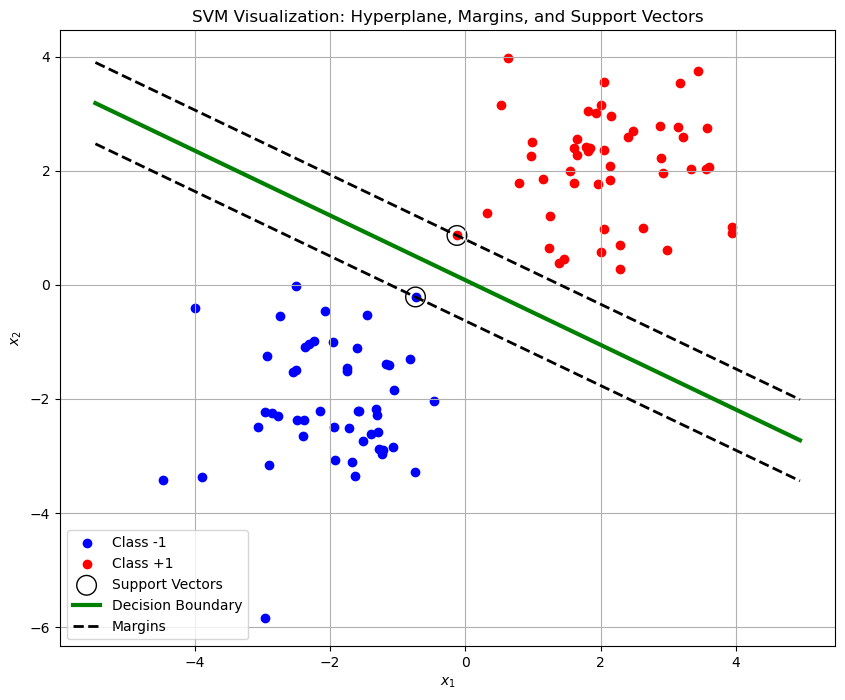

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate linearly separable data
np.random.seed(649)

# Class -1
X0 = np.random.randn(50,2) + np.array([-2, -2])
y0 = -np.ones(50)

# Class +1
X1 = np.random.randn(50,2) + np.array([2, 2])
y1 = np.ones(50)

X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

# Fit a hard-margin SVM  (large C approximates hard-margin)
clf = SVC(kernel='linear', C=1e6)
clf.fit(X, y)

w = clf.coef_[0]       # normal vector of boundary
b = clf.intercept_[0]  # offset
sv = clf.support_vectors_

# Plot the data, hyperplane, margins, and support vectors
plt.figure(figsize=(10,8))

# Scatter plot of each class
plt.scatter(X0[:,0], X0[:,1], color='blue', label='Class -1')
plt.scatter(X1[:,0], X1[:,1], color='red',  label='Class +1')

# Plot support vectors
plt.scatter(sv[:,0], sv[:,1], 
            s=200, facecolors='none', edgecolors='k',
            label='Support Vectors')

# Create x-range for plotting the lines
xs = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)

# Decision boundary:  w1*x + w2*y + b = 0
ys = -(w[0]*xs + b) / w[1]
plt.plot(xs, ys, 'g', linewidth=3, label="Decision Boundary")

# Margins: w·x + b = ±1
ys_m1 = -(w[0]*xs + b - 1) / w[1]
ys_m2 = -(w[0]*xs + b + 1) / w[1]
plt.plot(xs, ys_m1, 'k--', linewidth=2)
plt.plot(xs, ys_m2, 'k--', linewidth=2, label="Margins")

plt.title("SVM Visualization: Hyperplane, Margins, and Support Vectors")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True)
plt.show()